In [ ]:
import pandas as pd
import os
import numpy as np

In [15]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [16]:
!ls "/content/drive/MyDrive/NIH_XRAY"


Data_Entry_2017.csv.zip  images_001.zip  images_002.zip


In [17]:
!unzip "/content/drive/MyDrive/NIH_XRAY/images_001.zip" -d /content/nih_dataset/
!unzip "/content/drive/MyDrive/NIH_XRAY/images_002.zip" -d /content/nih_dataset/



Streaming output truncated to the last 5000 lines.
  inflating: /content/nih_dataset/images/00002587_004.png  
  inflating: /content/nih_dataset/images/00002587_005.png  
  inflating: /content/nih_dataset/images/00002588_000.png  
  inflating: /content/nih_dataset/images/00002589_000.png  
  inflating: /content/nih_dataset/images/00002589_001.png  
  inflating: /content/nih_dataset/images/00002589_002.png  
  inflating: /content/nih_dataset/images/00002589_003.png  
  inflating: /content/nih_dataset/images/00002589_004.png  
  inflating: /content/nih_dataset/images/00002589_005.png  
  inflating: /content/nih_dataset/images/00002589_006.png  
  inflating: /content/nih_dataset/images/00002589_007.png  
  inflating: /content/nih_dataset/images/00002590_000.png  
  inflating: /content/nih_dataset/images/00002591_000.png  
  inflating: /content/nih_dataset/images/00002592_000.png  
  inflating: /content/nih_dataset/images/00002592_001.png  
  inflating: /content/nih_dataset/images/00002592

In [18]:
!unzip "/content/drive/MyDrive/NIH_XRAY/Data_Entry_2017.csv.zip" -d /content/nih_dataset/

Archive:  /content/drive/MyDrive/NIH_XRAY/Data_Entry_2017.csv.zip
  inflating: /content/nih_dataset/Data_Entry_2017.csv  


In [19]:

df = pd.read_csv("/content/nih_dataset/Data_Entry_2017.csv")
img_dir = "/content/nih_dataset/images"
all_images = set(os.listdir(img_dir))
subset_df = df[df['Image Index'].isin(all_images)]
print("Total matched images:", len(subset_df))

subset_df.to_csv("/content/nih_dataset/subset_15000.csv", index=False)


Total matched images: 14999


In [20]:
subset_df

Image Index          Finding Labels  Follow-up #  Patient ID  \
0      00000001_000.png            Cardiomegaly            0           1   
1      00000001_001.png  Cardiomegaly|Emphysema            1           1   
2      00000001_002.png   Cardiomegaly|Effusion            2           1   
3      00000002_000.png              No Finding            0           2   
4      00000003_000.png                  Hernia            0           3   
...                 ...                     ...          ...         ...   
14994  00003923_009.png   Effusion|Infiltration            9        3923   
14995  00003923_010.png   Effusion|Infiltration           10        3923   
14996  00003923_011.png            Infiltration           11        3923   
14997  00003923_012.png              No Finding           12        3923   
14998  00003923_013.png              No Finding           13        3923   

       Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0               58              M            PA                 2682     2749   
1               58              M            PA                 2894     2729   
2               58              M            PA                 2500     2048   
3               81              M            PA                 2500     2048   
4               81              F            PA                 2582     2991   
...            ...            ...           ...                  ...      ...   
14994           28              M            AP                 2500     2048   
14995           28              M            AP                 2500     2048   
14996           28              M            AP                 2500     2048   
14997           28              M            AP                 2500     2048   
14998           28              M            AP                 2500     2048   

       OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                            0.143  0.143          NaN  
1                            0.143  0.143          NaN  
2                            0.168  0.168          NaN  
3                            0.171  0.171          NaN  
4                            0.143  0.143          NaN  
...                            ...    ...          ...  
14994                        0.171  0.171          NaN  
14995                        0.171  0.171          NaN  
14996                        0.171  0.171          NaN  
14997                        0.171  0.171          NaN  
14998                        0.171  0.171          NaN  

[14999 rows x 12 columns]

In [21]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  14999 non-null  object 
 1   Finding Labels               14999 non-null  object 
 2   Follow-up #                  14999 non-null  int64  
 3   Patient ID                   14999 non-null  int64  
 4   Patient Age                  14999 non-null  int64  
 5   Patient Gender               14999 non-null  object 
 6   View Position                14999 non-null  object 
 7   OriginalImage[Width          14999 non-null  int64  
 8   Height]                      14999 non-null  int64  
 9   OriginalImagePixelSpacing[x  14999 non-null  float64
 10  y]                           14999 non-null  float64
 11  Unnamed: 11                  0 non-null      float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.5+ MB


In [22]:
clean_df=subset_df.drop(["Follow-up #","OriginalImage[Width","Height]","OriginalImagePixelSpacing[x","y]","Unnamed: 11","Patient ID"],axis="columns")

In [23]:
clean_df

Image Index          Finding Labels  Patient Age Patient Gender  \
0      00000001_000.png            Cardiomegaly           58              M   
1      00000001_001.png  Cardiomegaly|Emphysema           58              M   
2      00000001_002.png   Cardiomegaly|Effusion           58              M   
3      00000002_000.png              No Finding           81              M   
4      00000003_000.png                  Hernia           81              F   
...                 ...                     ...          ...            ...   
14994  00003923_009.png   Effusion|Infiltration           28              M   
14995  00003923_010.png   Effusion|Infiltration           28              M   
14996  00003923_011.png            Infiltration           28              M   
14997  00003923_012.png              No Finding           28              M   
14998  00003923_013.png              No Finding           28              M   

      View Position  
0                PA  
1                PA  
2                PA  
3                PA  
4                PA  
...             ...  
14994            AP  
14995            AP  
14996            AP  
14997            AP  
14998            AP  

[14999 rows x 5 columns]

In [24]:
clean_df.replace({"M":1, "F":0, "PA":1, "AP":0}, inplace=True)

/tmp/ipython-input-60550438.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_df.replace({"M":1, "F":0, "PA":1, "AP":0}, inplace=True)


In [25]:
clean_df

Image Index          Finding Labels  Patient Age  Patient Gender  \
0      00000001_000.png            Cardiomegaly           58               1   
1      00000001_001.png  Cardiomegaly|Emphysema           58               1   
2      00000001_002.png   Cardiomegaly|Effusion           58               1   
3      00000002_000.png              No Finding           81               1   
4      00000003_000.png                  Hernia           81               0   
...                 ...                     ...          ...             ...   
14994  00003923_009.png   Effusion|Infiltration           28               1   
14995  00003923_010.png   Effusion|Infiltration           28               1   
14996  00003923_011.png            Infiltration           28               1   
14997  00003923_012.png              No Finding           28               1   
14998  00003923_013.png              No Finding           28               1   

       View Position  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
14994              0  
14995              0  
14996              0  
14997              0  
14998              0  

[14999 rows x 5 columns]

In [26]:
all_labels = sorted(set(l for sublist in clean_df['Finding Labels'].str.split('|') for l in sublist))
print("All labels:", all_labels)
for label in all_labels:
    clean_df[label] = clean_df['Finding Labels'].apply(lambda x: 1 if label in x.split('|') else 0)
clean_df = clean_df.drop(columns=['Finding Labels'])


All labels: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [27]:

clean_df

Image Index  Patient Age  Patient Gender  View Position  \
0      00000001_000.png           58               1              1   
1      00000001_001.png           58               1              1   
2      00000001_002.png           58               1              1   
3      00000002_000.png           81               1              1   
4      00000003_000.png           81               0              1   
...                 ...          ...             ...            ...   
14994  00003923_009.png           28               1              0   
14995  00003923_010.png           28               1              0   
14996  00003923_011.png           28               1              0   
14997  00003923_012.png           28               1              0   
14998  00003923_013.png           28               1              0   

       Atelectasis  Cardiomegaly  Consolidation  Edema  Effusion  Emphysema  \
0                0             1              0      0         0          0   
1                0             1              0      0         0          1   
2                0             1              0      0         1          0   
3                0             0              0      0         0          0   
4                0             0              0      0         0          0   
...            ...           ...            ...    ...       ...        ...   
14994            0             0              0      0         1          0   
14995            0             0              0      0         1          0   
14996            0             0              0      0         0          0   
14997            0             0              0      0         0          0   
14998            0             0              0      0         0          0   

       Fibrosis  Hernia  Infiltration  Mass  No Finding  Nodule  \
0             0       0             0     0           0       0   
1             0       0             0     0           0       0   
2             0       0             0     0           0       0   
3             0       0             0     0           1       0   
4             0       1             0     0           0       0   
...         ...     ...           ...   ...         ...     ...   
14994         0       0             1     0           0       0   
14995         0       0             1     0           0       0   
14996         0       0             1     0           0       0   
14997         0       0             0     0           1       0   
14998         0       0             0     0           1       0   

       Pleural_Thickening  Pneumonia  Pneumothorax  
0                       0          0             0  
1                       0          0             0  
2                       0          0             0  
3                       0          0             0  
4                       0          0             0  
...                   ...        ...           ...  
14994                   0          0             0  
14995                   0          0             0  
14996                   0          0             0  
14997                   0          0             0  
14998                   0          0             0  

[14999 rows x 19 columns]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [30]:
tabular_features = ['Patient Age', 'Patient Gender', 'View Position']
label_cols = clean_df.columns[4:]
img_dir = "/content/nih_dataset/images"

In [31]:
train_df, temp_df = train_test_split(clean_df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [32]:
scaler = MinMaxScaler()
train_tab = scaler.fit_transform(train_df[tabular_features])
val_tab = scaler.transform(val_df[tabular_features])
test_tab = scaler.transform(test_df[tabular_features])


In [33]:
y_train = train_df[label_cols].values
y_val = val_df[label_cols].values
y_test = test_df[label_cols].values


In [34]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
IMG_SIZE = (224, 224)
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def load_images(df_subset):
    images = []
    for fname in df_subset['Image Index']:
        img_path = os.path.join(img_dir, fname)
        img = load_img(img_path, target_size=IMG_SIZE)
        img = img_to_array(img) / 255.0
        images.append(img)
    return np.array(images)


In [36]:
#X_train_img = load_images(train_df)
#X_val_img = load_images(val_df)
#X_test_img = load_images(test_df)

In [37]:
train_paths = [os.path.join(img_dir, fname) for fname in train_df['Image Index']]
val_paths   = [os.path.join(img_dir, fname) for fname in val_df['Image Index']]
test_paths  = [os.path.join(img_dir, fname) for fname in test_df['Image Index']]

In [38]:
def process_image(filename, label, tab_features):
    img = tf.io.read_file(filename)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = img / 255.0

    return ({"image_input": img, "tab_input": tab_features}, label)

In [39]:
BATCH_SIZE=32

In [40]:

train_ds = tf.data.Dataset.from_tensor_slices((train_paths, y_train, train_tab))
train_ds = train_ds.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


val_ds = tf.data.Dataset.from_tensor_slices((val_paths, y_val, val_tab))
val_ds = val_ds.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_paths, y_test, test_tab))
test_ds = test_ds.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [41]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf

# **Model Training Part 1**

In [ ]:


IMG_SHAPE = (224, 224, 3)
NUM_CLASSES = y_train.shape[1]


image_input = Input(shape=IMG_SHAPE, name="image_input")
base_model = DenseNet121(weights="imagenet", include_top=False, input_tensor=image_input)
x = GlobalAveragePooling2D()(base_model.output)

tab_input = Input(shape=(train_tab.shape[1],), name="tab_input")

combined = Concatenate()([x, tab_input])
combined = Dense(256, activation="relu")(combined)
combined = Dropout(0.3)(combined)
output = Dense(NUM_CLASSES, activation="sigmoid")(combined)
model = Model(inputs=[image_input, tab_input], outputs=output)


model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy", tf.keras.metrics.AUC(multi_label=True)])


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


In [ ]:

NUM_CLASSES = y_train.shape[1]

# Image input
image_input = Input(shape=(224,224,3), name="image_input")
base_model = DenseNet121(weights="imagenet", include_top=False, input_tensor=image_input)
base_model.trainable = False  # freeze base initially
x = GlobalAveragePooling2D()(base_model.output)

# Tabular input
tab_input = Input(shape=(train_tab.shape[1],), name="tab_input")

# Combine
combined = Concatenate()([x, tab_input])
combined = Dense(256, activation="relu")(combined)
combined = Dropout(0.3)(combined)
output = Dense(NUM_CLASSES, activation="sigmoid")(combined)

model = Model(inputs=[image_input, tab_input], outputs=output)

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(multi_label=True)]
)

model.summary()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor="val_auc", mode="max", patience=5, restore_best_weights=True)
mc = ModelCheckpoint("best_model.h5", monitor="val_auc", mode="max", save_best_only=True)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[es, mc]
)


In [ ]:
model.save("/content/drive/MyDrive/NIH_XRAY/best_model.h5")


# **Model Training part 2**

In [42]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/NIH_XRAY/best_model.h5')


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_6    │ (None, 230, 230,  │          0 │ image_input[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_6… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_7    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_7… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,304,529 (27.86 MB)

 Trainable params: 267,023 (1.02 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 2 (12.00 B)

In [43]:
print(tf.executing_eagerly())

True


In [44]:
model = load_model("/content/drive/MyDrive/NIH_XRAY/best_model.h5", compile=False)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    initial_epoch=10
)

Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 238s 524ms/step - accuracy: 0.5839 - auc: 0.8791 - loss: 0.1855 - val_accuracy: 0.5807 - val_auc: 0.8840 - val_loss: 0.1799
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 165s 407ms/step - accuracy: 0.5783 - auc: 0.8826 - loss: 0.1843 - val_accuracy: 0.5813 - val_auc: 0.8841 - val_loss: 0.1795
Epoch 13/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 168s 416ms/step - accuracy: 0.5836 - auc: 0.8838 - loss: 0.1832 - val_accuracy: 0.5787 - val_auc: 0.8844 - val_loss: 0.1795
Epoch 14/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 177s 439ms/step - accuracy: 0.5861 - auc: 0.8884 - loss: 0.1803 - val_accuracy: 0.5833 - val_auc: 0.8852 - val_loss: 0.1792
Epoch 15/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 195s 420ms/step - accuracy: 0.5852 - auc: 0.8884 - loss: 0.1818 - val_accuracy: 0.5827 - val_auc: 0.8850 - val_loss: 0.1799
Epoch 16/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 166s 412ms/step - accuracy: 0.5805 - auc: 0.8879 - loss: 0.1815 - val_accuracy: 0.5787 - val_auc: 0.8848 - val_loss: 0.1795
Epoch 17/2

In [45]:

for layer in model.layers:
    layer.trainable = False
for layer in model.layers[-20:]:
    layer.trainable = True

from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # smaller LR for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

In [47]:
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    initial_epoch=20
)


Epoch 21/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 204s 511ms/step - accuracy: 0.5751 - auc: 0.8813 - loss: 0.1873 - val_accuracy: 0.5813 - val_auc: 0.8787 - val_loss: 0.1829
Epoch 22/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 179s 447ms/step - accuracy: 0.5823 - auc: 0.8908 - loss: 0.1797 - val_accuracy: 0.5807 - val_auc: 0.8796 - val_loss: 0.1824
Epoch 23/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 202s 448ms/step - accuracy: 0.5867 - auc: 0.8948 - loss: 0.1778 - val_accuracy: 0.5793 - val_auc: 0.8804 - val_loss: 0.1820
Epoch 24/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 199s 434ms/step - accuracy: 0.5900 - auc: 0.8978 - loss: 0.1752 - val_accuracy: 0.5840 - val_auc: 0.8811 - val_loss: 0.1815
Epoch 25/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 174s 430ms/step - accuracy: 0.5912 - auc: 0.8977 - loss: 0.1757 - val_accuracy: 0.5820 - val_auc: 0.8814 - val_loss: 0.1813


In [48]:
model.save("densenet_model.h5")
from google.colab import files
files.download("densenet_model.h5")

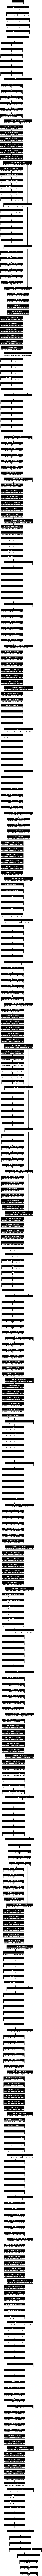

In [49]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_summary.png', show_shapes=True, show_layer_names=True)


# **Evaulation and Graphs**

In [50]:
test_labels = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Effusion", "Emphysema", "Fibrosis", "Hernia",
    "Infiltration", "Mass", "No Finding", "Nodule",
    "Pleural Thickening", "Pneumonia", "Pneumothorax"
]


In [73]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

test_labels = ['Atelectasis','Cardiomegaly','Consolidation','Edema','Effusion',
               'Emphysema','Fibrosis','Hernia','Infiltration','Mass','No Finding',
               'Nodule','Pleural_Thickening','Pneumonia','Pneumothorax']

y_true = []
y_pred_prob = []

for batch in test_ds:
    inputs, labels = batch
    preds = model.predict(inputs)
    y_true.append(labels.numpy())
    y_pred_prob.append(preds)

y_true = np.vstack(y_true)
y_pred_prob = np.vstack(y_pred_prob)

y_pred_binary = (y_pred_prob >= 0.5).astype(int)


report = classification_report(y_true, y_pred_binary, target_names=test_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print(report_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
report_df

precision    recall  f1-score  support
Atelectasis          1.000000  0.015267  0.030075    131.0
Cardiomegaly         0.000000  0.000000  0.000000     31.0
Consolidation        0.000000  0.000000  0.000000     55.0
Edema                0.000000  0.000000  0.000000     24.0
Effusion             0.555556  0.075758  0.133333    132.0
Emphysema            0.000000  0.000000  0.000000     28.0
Fibrosis             0.000000  0.000000  0.000000     45.0
Hernia               0.000000  0.000000  0.000000      3.0
Infiltration         0.333333  0.024793  0.046154    242.0
Mass                 0.000000  0.000000  0.000000     50.0
No Finding           0.683878  0.752900  0.716731    862.0
Nodule               0.000000  0.000000  0.000000     79.0
Pleural_Thickening   0.000000  0.000000  0.000000     39.0
Pneumonia            0.000000  0.000000  0.000000     19.0
Pneumothorax         0.000000  0.000000  0.000000     65.0
micro avg            0.675785  0.369529  0.477794   1805.0
macro avg            0.171518  0.057915  0.061753   1805.0
weighted avg         0.484489  0.369529  0.360405   1805.0
samples avg          0.443667  0.440222  0.441333   1805.0

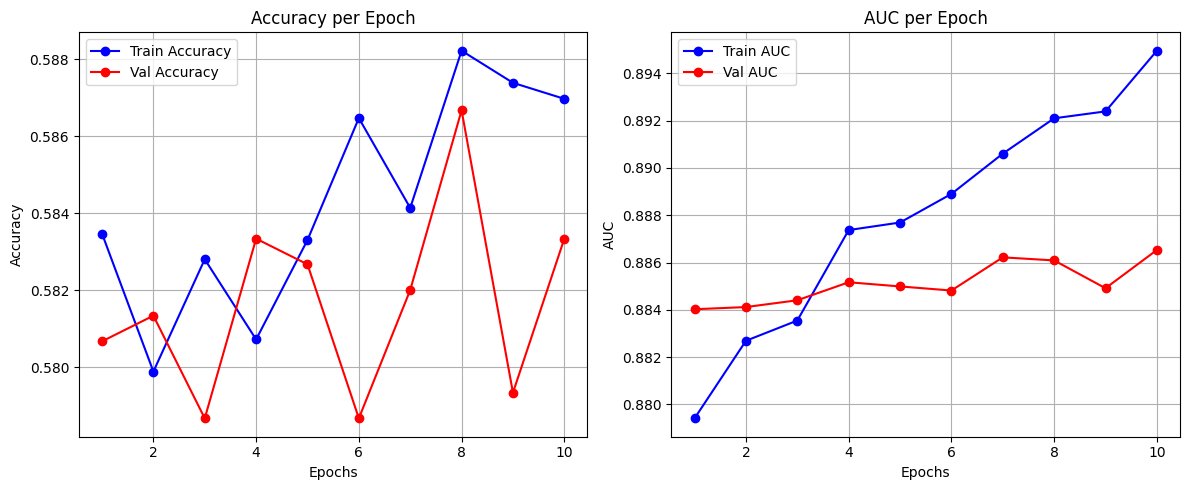

In [53]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
auc = history.history['auc']
val_auc = history.history['val_auc']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-o', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r-o', label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epochs, auc, 'b-o', label='Train AUC')
plt.plot(epochs, val_auc, 'r-o', label='Val AUC')
plt.title('AUC per Epoch')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('accuracy_auc_per_epoch.png', dpi=300)
plt.show()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 360ms/step


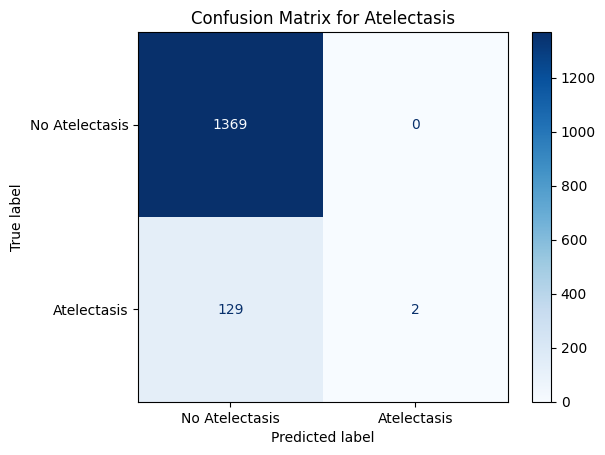

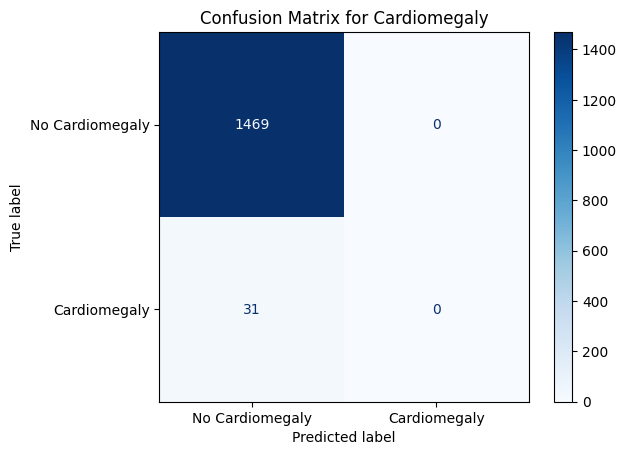

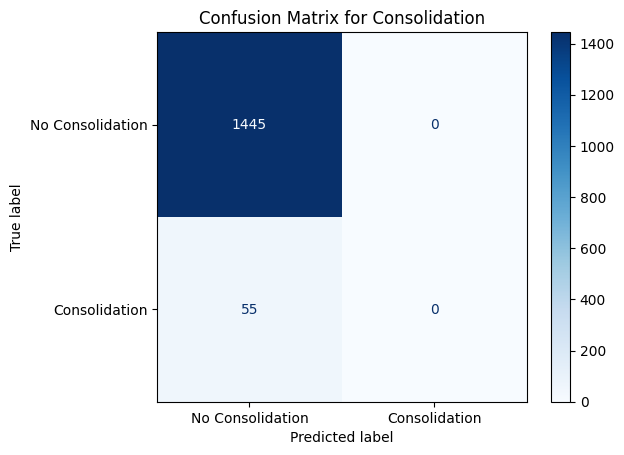

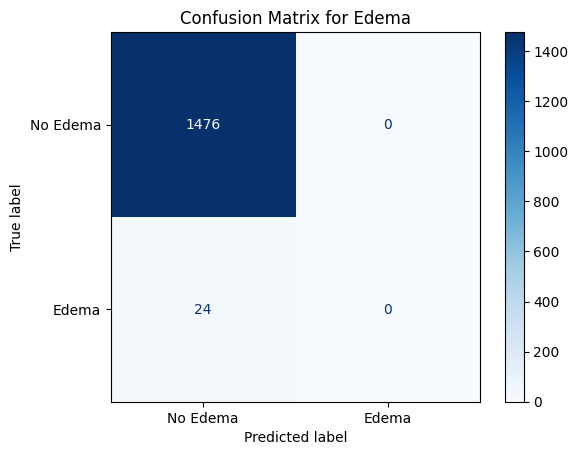

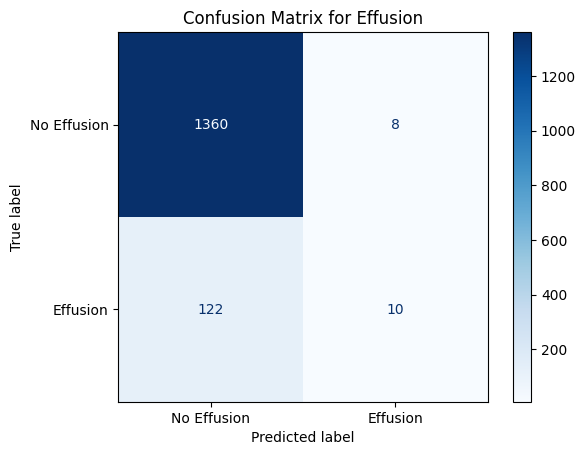

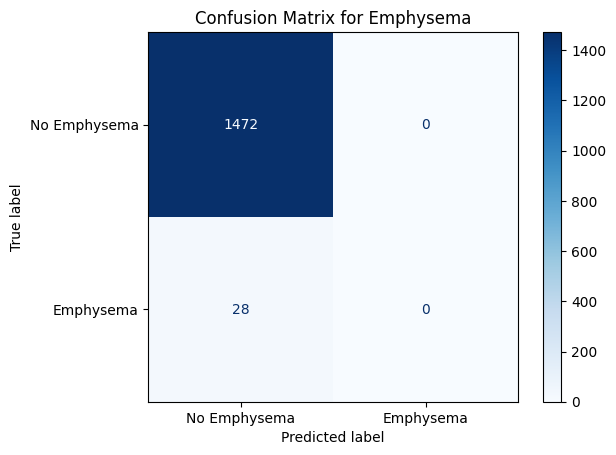

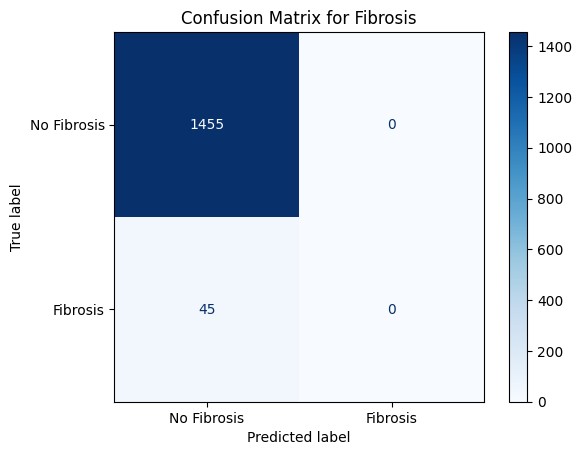

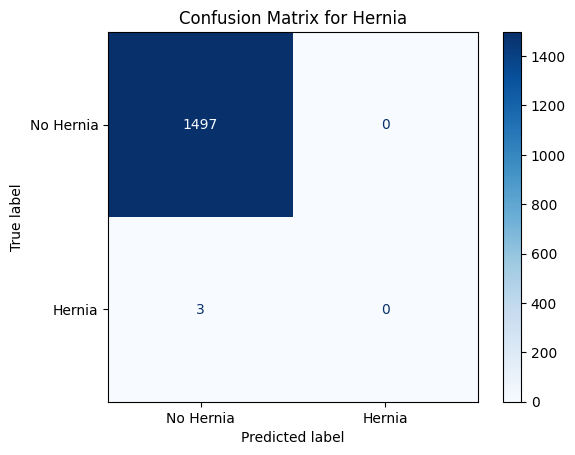

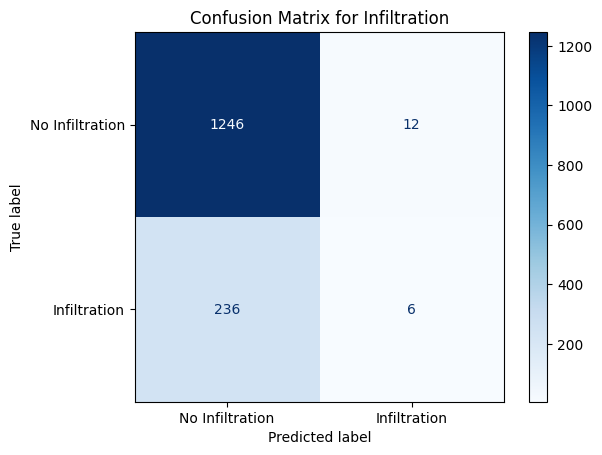

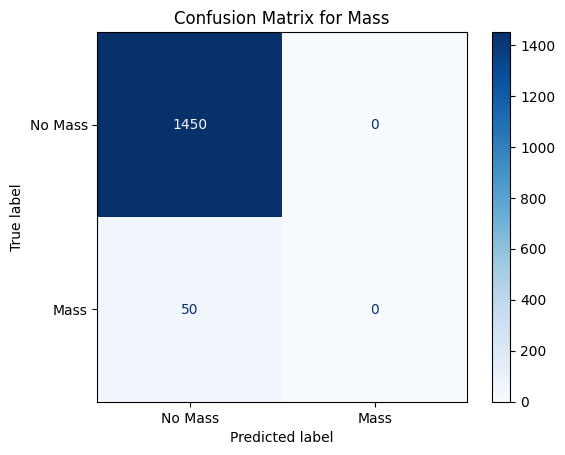

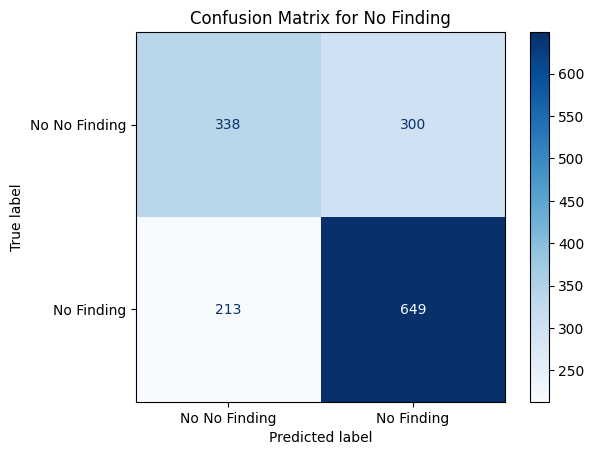

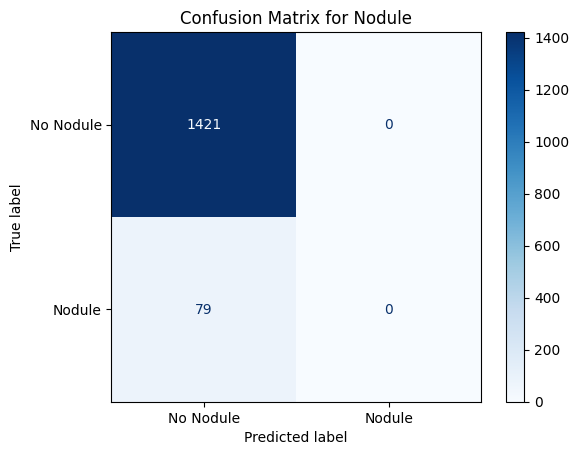

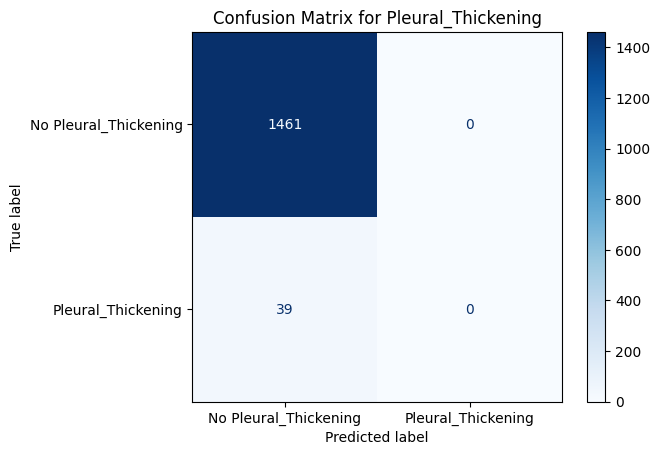

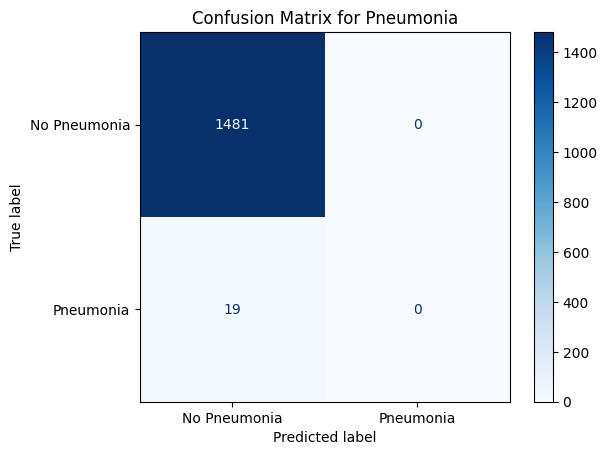

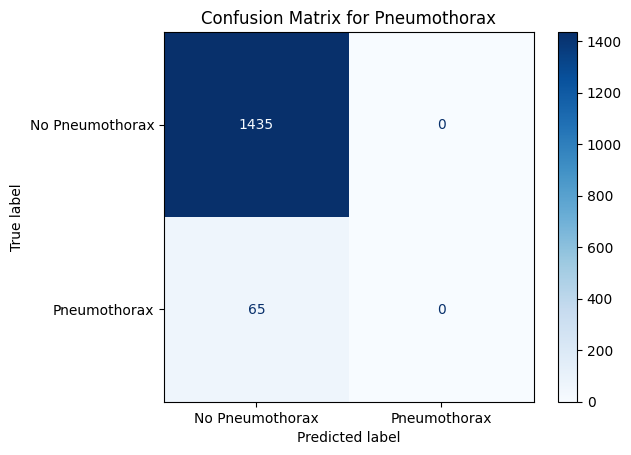

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = model.predict(test_ds)
y_pred = (y_pred_prob > 0.5).astype(int)

y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)


for i, disease in enumerate(clean_df.columns[4:]):
    cm = confusion_matrix(y_true[:,i], y_pred[:,i])
    disp = ConfusionMatrixDisplay(cm, display_labels=[f'No {disease}', disease])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {disease}')
    plt.savefig(f'confusion_matrix_{disease}.png', dpi=300)
    plt.show()

In [82]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

# Make sure y_true and y_pred_prob are numpy arrays
y_true = np.vstack(y_true)        # shape: (num_samples, num_classes)
y_pred_prob = np.vstack(y_pred_prob)  # shape: (num_samples, num_classes)

# Disease names (columns corresponding to labels)
disease_names = clean_df.columns[4:]  # assuming first 4 are tabular features

auc_scores = []

for i, disease in enumerate(disease_names):
    try:
        auc = roc_auc_score(y_true[:, i], y_pred_prob[:, i])
    except ValueError:
        auc = np.nan  # if a disease has no positive samples in y_true
    auc_scores.append(auc)
    print(f'{disease}: {auc:.4f}')

# Create table
auc_table = pd.DataFrame({'Disease': disease_names, 'AUC': auc_scores})
auc_table.to_csv('per_disease_auc.csv', index=False)
print(auc_table)


Atelectasis: 0.7113
Cardiomegaly: 0.7916
Consolidation: 0.7059
Edema: 0.8259
Effusion: 0.7985
Emphysema: 0.8186
Fibrosis: 0.6764
Hernia: 0.8631
Infiltration: 0.6541
Mass: 0.6426
No Finding: 0.6931
Nodule: 0.5807
Pleural_Thickening: 0.6548
Pneumonia: 0.6013
Pneumothorax: 0.7952
               Disease       AUC
0          Atelectasis  0.711284
1         Cardiomegaly  0.791629
2        Consolidation  0.705920
3                Edema  0.825881
4             Effusion  0.798517
5            Emphysema  0.818566
6             Fibrosis  0.676365
7               Hernia  0.863059
8         Infiltration  0.654144
9                 Mass  0.642648
10          No Finding  0.693065
11              Nodule  0.580693
12  Pleural_Thickening  0.654803
13           Pneumonia  0.601336
14        Pneumothorax  0.795154


In [83]:
auc_table

Disease       AUC
0          Atelectasis  0.711284
1         Cardiomegaly  0.791629
2        Consolidation  0.705920
3                Edema  0.825881
4             Effusion  0.798517
5            Emphysema  0.818566
6             Fibrosis  0.676365
7               Hernia  0.863059
8         Infiltration  0.654144
9                 Mass  0.642648
10          No Finding  0.693065
11              Nodule  0.580693
12  Pleural_Thickening  0.654803
13           Pneumonia  0.601336
14        Pneumothorax  0.795154

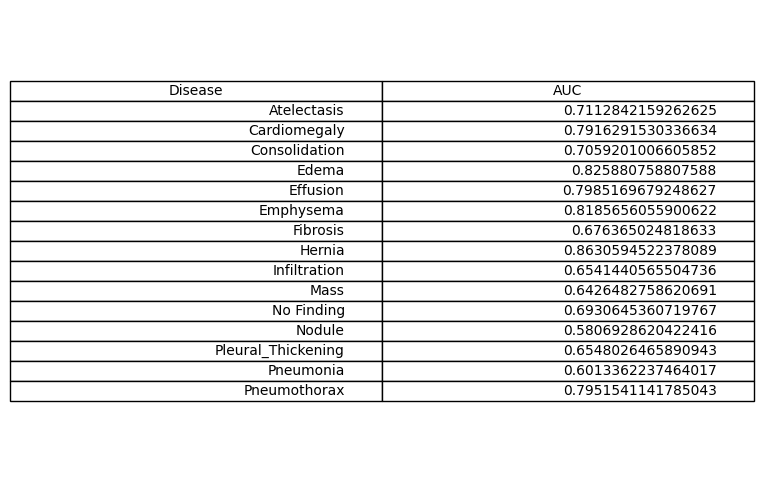

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'auc_table' is the DataFrame containing the AUC scores
# If not, make sure the correct DataFrame name is used here.

fig, ax = plt.subplots(figsize=(8, 6)) # Adjust figure size as needed
ax.axis('off') # Hide axes

# Create a table from the DataFrame
table = ax.table(cellText=auc_table.values, colLabels=auc_table.columns, loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2) # Adjust scale as needed

plt.savefig('auc_table.png', bbox_inches='tight', dpi=300)
plt.show()

In [90]:
from sklearn.metrics import roc_auc_score

total_auc_micro = roc_auc_score(y_true, y_pred_prob, average='micro')
print(f"Total AUC (micro): {total_auc_micro:.4f}")

total_auc_macro = roc_auc_score(y_true, y_pred_prob, average='macro')
print(f"Total AUC (macro): {total_auc_macro:.4f}")


Total AUC (micro): 0.8772
Total AUC (macro): 0.7209


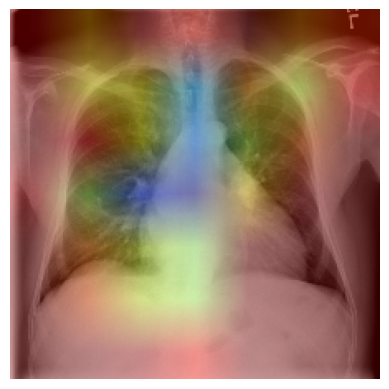

In [88]:

grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer('conv5_block16_2_conv').output, model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model([[img_array, tab_features]])
    loss = predictions[:,0]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)
heatmap = tf.maximum(heatmap, 0)/tf.math.reduce_max(heatmap)

import cv2

img_orig = cv2.imread(sample_img_path)
img_orig = cv2.resize(img_orig, (224,224))
img_orig = img_orig.astype(np.uint8)

heatmap = cv2.applyColorMap(np.uint8(255*heatmap.numpy()), cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
heatmap = cv2.resize(heatmap, (img_orig.shape[1], img_orig.shape[0]))

superimposed_img = cv2.addWeighted(img_orig, 0.6, heatmap, 0.4, 0)
cv2.imwrite('gradcam_sample.png', superimposed_img)
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



In [ ]:
Grad-CAM visualization highlighting regions of the chest X-ray that contributed most to the model's prediction.